# TITANIC 

### Sankeerthana Satini

### Create a model that predicts which passengers survived the Titanic shipwreck.

This would be a classification problem as either the person survives or does not survive. Another question from this would be feature importance, as to which features are important in the prediction. The passengers can be filtered out based on the predictions. 

"...which passengers survived the Titanic Shipwreck", which classes of which features have a higher probability to get 1 under the 'Survived' feature.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Looking from this, I can say that there are 12 columns, out of which the label is the column Survived. Therefore, there are 11 Features and 1 Label.

In [5]:
pass_id = train[["PassengerId"]]

#### Description of the Variables

Variable	Definition	Key


survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd


sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
label = train["Survived"]

In [8]:
type(label)

pandas.core.series.Series

In [9]:
#Converting from Series to DataFrame
label = pd.DataFrame(data=label)

In [10]:
#Dropping 'survived' from the dataset as it is the label, and better to have it as the last column while dealing with
#Random Forest
train = train.drop(["Survived"], axis=1)

In [11]:
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Since PassengerId and Name are unique features, it is not very useful in the EDA and the prediction of the model and can be omitted

In [12]:
#Dropping the PassengerId and Name from the dataset
train = train.drop(["PassengerId","Name"], axis=1)

In [13]:
train.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,female,35.0,1,0,113803,53.1000,C123,S
4,3,male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
#Finding the number of NaN values to carry out NA Imputation
train.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Age is float64 data type and therefore can be imputed using NA Imputation using Mean value. 

Cabin is of the object data type.

In [15]:
#Importing the relevant library
from sklearn.impute import SimpleImputer

In [16]:
#Setting the imputer to replace NaN values with the mean
imp_1 = SimpleImputer(missing_values=np.nan, strategy='mean')

#### Age

In [17]:
#age is a Series
age = train["Age"]

In [18]:
#Converting from Series to DataFrame
age = pd.DataFrame(data=age)

In [19]:
age.head()

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [20]:
#Need to do this step as simple imputer takes in 2D array - age and fare
fare = train["Fare"]

In [21]:
fare = pd.DataFrame(data=fare)

In [22]:
age_fare = pd.concat([age,fare],axis=1)

In [23]:
age_fare.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [24]:
age_fare.isnull().sum()

Age     177
Fare      0
dtype: int64

In [25]:
age_fare = imp_1.fit_transform(age_fare)

In [26]:
age_fare

array([[22.        ,  7.25      ],
       [38.        , 71.2833    ],
       [26.        ,  7.925     ],
       ...,
       [29.69911765, 23.45      ],
       [26.        , 30.        ],
       [32.        ,  7.75      ]])

In [27]:
age_fare = pd.DataFrame(data=age_fare,columns=["Age", "Fare"])

In [28]:
age_fare.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [29]:
age_fare.isnull().sum()

Age     0
Fare    0
dtype: int64

In [30]:
age = age_fare["Age"]

In [31]:
age = pd.DataFrame(data=age)

In [32]:
age.head()

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [33]:
train = train.drop(["Age"],axis=1)

In [34]:
train.head()

,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,1,0,A/5 21171,7.2500,NaN,S
1,1,female,1,0,PC 17599,71.2833,C85,C
2,3,female,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,female,1,0,113803,53.1000,C123,S
4,3,male,0,0,373450,8.0500,NaN,S


In [35]:
train = pd.concat([train,age],axis=1)

In [36]:
train.head()

,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age
0,3,male,1,0,A/5 21171,7.2500,NaN,S,22.0
1,1,female,1,0,PC 17599,71.2833,C85,C,38.0
2,3,female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,1,female,1,0,113803,53.1000,C123,S,35.0
4,3,male,0,0,373450,8.0500,NaN,S,35.0


#### Cabin

In [37]:
cabin = train["Cabin"]

In [38]:
cabin = pd.DataFrame(data=cabin)

In [39]:
fare = train["Fare"]

In [40]:
fare = pd.DataFrame(data=fare)

In [41]:
cab_fare = pd.concat([cabin,fare],axis=1)

In [42]:
cab_fare.head()

,Cabin,Fare
0,NaN,7.2500
1,C85,71.2833
2,NaN,7.9250
3,C123,53.1000
4,NaN,8.0500


In [43]:
cab_fare.isnull().sum()

Cabin    687
Fare       0
dtype: int64

In [44]:
imp_2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [45]:
cab_fare = imp_2.fit_transform(cab_fare)

In [46]:
cab_fare

array([['B96 B98', 7.25],
       ['C85', 71.2833],
       ['B96 B98', 7.925],
       ...,
       ['B96 B98', 23.45],
       ['C148', 30.0],
       ['B96 B98', 7.75]], dtype=object)

In [47]:
cab_fare = pd.DataFrame(data=cab_fare, columns=["Cabin","Fare"])

In [48]:
cab_fare.isnull().sum()

Cabin    0
Fare     0
dtype: int64

In [49]:
cabin = cab_fare["Cabin"]

In [50]:
train = train.drop(["Cabin"],axis=1)

In [51]:
train = pd.concat([train,cabin],axis=1)

In [52]:
train.head()

,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age,Cabin
0,3,male,1,0,A/5 21171,7.2500,S,22.0,B96 B98
1,1,female,1,0,PC 17599,71.2833,C,38.0,C85
2,3,female,0,0,STON/O2. 3101282,7.9250,S,26.0,B96 B98
3,1,female,1,0,113803,53.1000,S,35.0,C123
4,3,male,0,0,373450,8.0500,S,35.0,B96 B98


#### Embarked

In [53]:
emb = train["Embarked"]

In [54]:
emb = pd.DataFrame(data=emb)

In [55]:
emb.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [56]:
emb_fare = pd.concat([emb,fare],axis=1)

In [57]:
emb_fare.isnull().sum()

Embarked    2
Fare        0
dtype: int64

In [58]:
emb_fare = imp_2.fit_transform(emb_fare)

In [59]:
emb_fare

array([['S', 7.25],
       ['C', 71.2833],
       ['S', 7.925],
       ...,
       ['S', 23.45],
       ['C', 30.0],
       ['Q', 7.75]], dtype=object)

In [60]:
emb_fare = pd.DataFrame(data=emb_fare,columns=["Embarked","Fare"])

In [61]:
emb_fare.isnull().sum()

Embarked    0
Fare        0
dtype: int64

In [62]:
emb = emb_fare["Embarked"]

In [63]:
emb = pd.DataFrame(data=emb)

In [64]:
train = train.drop(["Embarked"],axis=1)

In [65]:
train = pd.concat([train,emb],axis=1)

In [66]:
train.isnull().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Age         0
Cabin       0
Embarked    0
dtype: int64

In [67]:
train.head()

,Pclass,Sex,SibSp,Parch,Ticket,Fare,Age,Cabin,Embarked
0,3,male,1,0,A/5 21171,7.2500,22.0,B96 B98,S
1,1,female,1,0,PC 17599,71.2833,38.0,C85,C
2,3,female,0,0,STON/O2. 3101282,7.9250,26.0,B96 B98,S
3,1,female,1,0,113803,53.1000,35.0,C123,S
4,3,male,0,0,373450,8.0500,35.0,B96 B98,S


### Exploratory Data Analysis

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Pclass      891 non-null int64
Sex         891 non-null object
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Age         891 non-null float64
Cabin       891 non-null object
Embarked    891 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 62.7+ KB


In [69]:
#Only considers the numeric values
train.describe()

,Pclass,SibSp,Parch,Fare,Age
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.523008,0.381594,32.204208,29.699118
std,0.836071,1.102743,0.806057,49.693429,13.002015
min,1.000000,0.000000,0.000000,0.000000,0.420000
25%,2.000000,0.000000,0.000000,7.910400,22.000000
50%,3.000000,0.000000,0.000000,14.454200,29.699118
75%,3.000000,1.000000,0.000000,31.000000,35.000000
max,3.000000,8.000000,6.000000,512.329200,80.000000


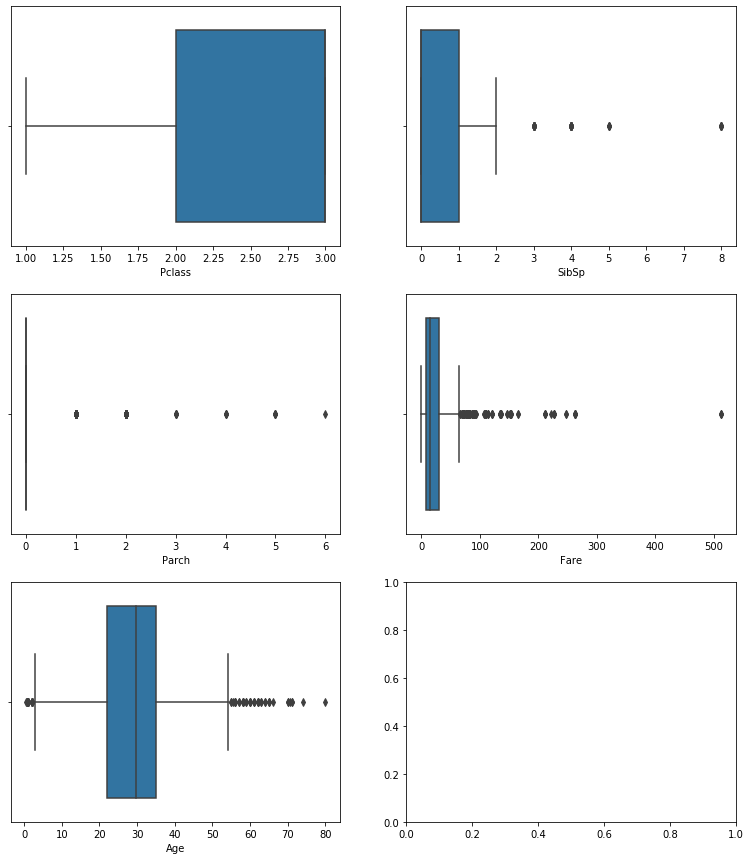

In [70]:
f, axes = plt.subplots(3,2 ,figsize=(13,15))

sb.boxplot(train["Pclass"], ax = axes[0, 0])
sb.boxplot(train["SibSp"], ax = axes[0, 1])
sb.boxplot(train["Parch"], ax = axes[1, 0])
sb.boxplot(train["Fare"], ax = axes[1, 1])
sb.boxplot(train["Age"], ax = axes[2, 0])


Would not be removing outliers as they might show interesting trends. In addition, since Random Forest will be used, the outliers will be taken care of.

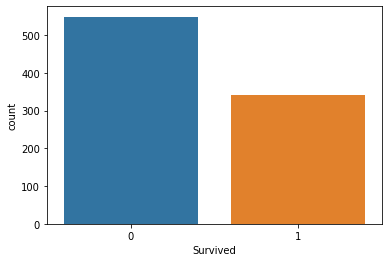

In [71]:
#Checking the countplot of the label to look for any unbalanced classes
sb.countplot(x="Survived", data=label)
#sns.countplot(x="geo_level_1_id", data=df, hue='damage_grade')

In [72]:
#TO convert into series form df, just extract that row out
label = label["Survived"]

In [73]:
type(label)

pandas.core.series.Series

In [74]:
label.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [75]:
549/342

1.605263157894737

Not going to balance the data first as the ratio is somewhat close 1.60:1

In [76]:
label = pd.DataFrame(data=label)

In [77]:
label.isnull().sum()

Survived    0
dtype: int64

In [78]:
#Joining the label with the feature dataset
train = pd.concat([train,label],axis=1)

In [79]:
train.head()

,Pclass,Sex,SibSp,Parch,Ticket,Fare,Age,Cabin,Embarked,Survived
0,3,male,1,0,A/5 21171,7.2500,22.0,B96 B98,S,0
1,1,female,1,0,PC 17599,71.2833,38.0,C85,C,1
2,3,female,0,0,STON/O2. 3101282,7.9250,26.0,B96 B98,S,1
3,1,female,1,0,113803,53.1000,35.0,C123,S,1
4,3,male,0,0,373450,8.0500,35.0,B96 B98,S,0


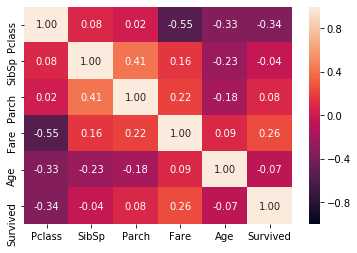

In [80]:
#Only considers the numeric features
sb.heatmap(train.corr(), vmin=-1, vmax=1, annot = True, fmt=".2f")

The highest negative correlation with survived is -0.55, between Pclass and Survived and the highest positive correlation is 0.26 which is in between Fare and Survived. However, this only includes the numeric features and not the features of the datatype object. Therefore, we would need to use feature importance after Random Forest Classifier.


###### FYI
–1. A perfect negative (downward sloping) linear relationship

–0.70. A strong negative (downward sloping) linear relationship

–0.50. A moderate negative (downhill sloping) relationship

–0.30. A weak negative (downhill sloping) linear relationship

#### Comparing Gender and Survived

In [81]:
sex = train["Sex"]

In [82]:
sex = pd.DataFrame(data=sex)

In [83]:
gender = pd.concat([sex,label],axis=1)

In [84]:
gender.head()

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0


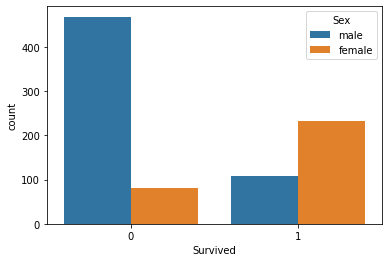

In [85]:
sb.countplot(x="Survived", data=gender, hue="Sex")

From this graph, we can see that out of those who survived, most were Female. A surprising number of men did not survive. This would be because from prior knowledge we know that women and children were first sent out of the ship, before men, as an act of chivalry. 

#### Comparing Age and Survived

In [86]:
age = train["Age"]

In [87]:
age.value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
30.000000     25
19.000000     25
21.000000     24
25.000000     23
36.000000     22
29.000000     20
35.000000     18
26.000000     18
32.000000     18
27.000000     18
31.000000     17
16.000000     17
23.000000     15
34.000000     15
33.000000     15
20.000000     15
39.000000     14
40.000000     13
42.000000     13
17.000000     13
45.000000     12
38.000000     11
4.000000      10
50.000000     10
2.000000      10
            ... 
0.830000       2
30.500000      2
0.750000       2
57.000000      2
55.000000      2
70.000000      2
10.000000      2
32.500000      2
71.000000      2
63.000000      2
28.500000      2
45.500000      2
40.500000      2
59.000000      2
14.500000      1
0.670000       1
12.000000      1
0.920000       1
74.000000      1
34.500000      1
70.500000      1
36.500000      1
24.500000      1
66.000000      1
80.000000      1
55.500000      1
53.000000      1
20.500000     

In [88]:
age = pd.DataFrame(data=age)

In [89]:
age = pd.concat([age,label],axis=1)

In [90]:
age.head()

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0


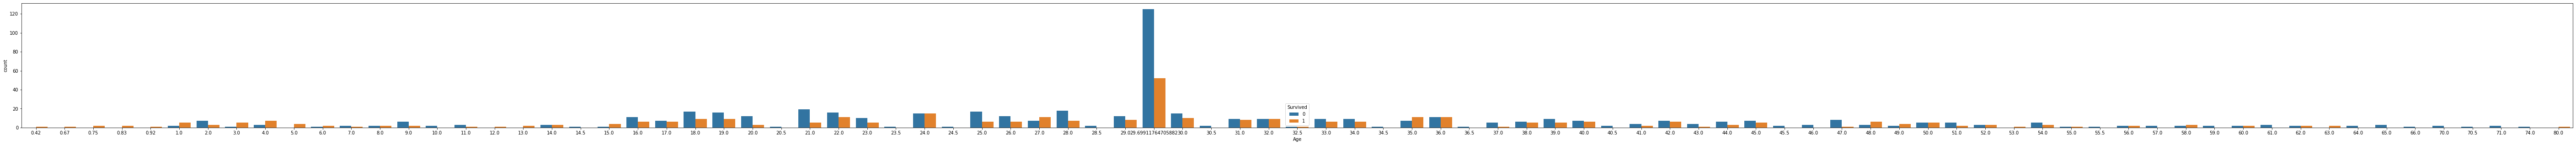

In [91]:
f, axes = plt.subplots(1,1 ,figsize=(100,5))
sb.countplot(x="Age", data=age, hue="Survived")

As seen from the graph, most of the people were of the age 29.69918, out of which, 127 did not survive and 50 did. 

#### Comparing Cabin and Survived

In [92]:
cabin = train["Cabin"]

In [93]:
cabin = pd.DataFrame(data=cabin)

In [94]:
cabin = pd.concat([cabin,label],axis=1)

In [95]:
cabin.head()

,Cabin,Survived
0,B96 B98,0
1,C85,1
2,B96 B98,1
3,C123,1
4,B96 B98,0


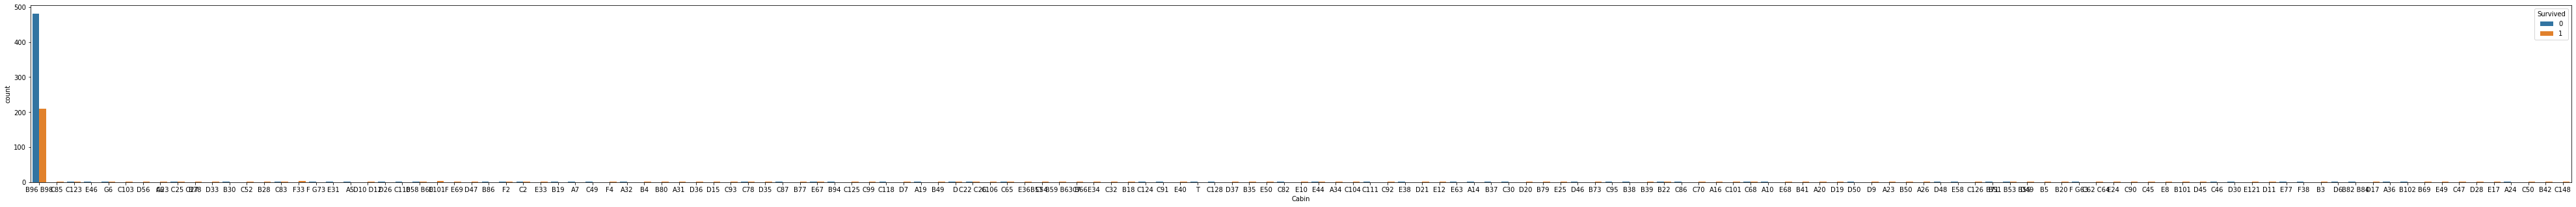

In [96]:
f, axes = plt.subplots(1,1 ,figsize=(70,5))
sb.countplot(x="Cabin", data=cabin, hue="Survived")

Most of the people who survived was from B96 Cabin, and most of the people who did not survive were B98. However, this could have been due to NA Imputation where the NA Values were replaced with the Most Frequently occuring String.

Overall, from the EDA, we can say that the features which prove to have a strong impact on whether the passengers survived is Sex, Age, PClass and Fare.

In [97]:
train.head()

,Pclass,Sex,SibSp,Parch,Ticket,Fare,Age,Cabin,Embarked,Survived
0,3,male,1,0,A/5 21171,7.2500,22.0,B96 B98,S,0
1,1,female,1,0,PC 17599,71.2833,38.0,C85,C,1
2,3,female,0,0,STON/O2. 3101282,7.9250,26.0,B96 B98,S,1
3,1,female,1,0,113803,53.1000,35.0,C123,S,1
4,3,male,0,0,373450,8.0500,35.0,B96 B98,S,0


### One-Hot Encoding

In [98]:
#Finding out the categorical variables of the data type object
train.select_dtypes(['object']).columns

Index(['Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [99]:
#Getting the 1s and 0s
dummies = pd.get_dummies(train[['Sex', 'Ticket', 'Cabin', 'Embarked']], drop_first=False)

In [100]:
#Viewing the dummies
dummies.head()

,Sex_female,Sex_male,Ticket_110152,Ticket_110413,Ticket_110465,Ticket_110564,Ticket_110813,Ticket_111240,Ticket_111320,Ticket_111361,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [101]:
#Dropping the original object data type features to make way for the new ones
train = train.drop(['Sex', 'Ticket', 'Cabin', 'Embarked', 'Survived'], axis=1)

In [102]:
#Concatenating the dummies and the original dataset
train = pd.concat([train, dummies], axis=1)

In [103]:
train.head()

,Pclass,SibSp,Parch,Fare,Age,Sex_female,Sex_male,Ticket_110152,Ticket_110413,Ticket_110465,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,7.2500,22.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,0,71.2833,38.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,0,0,7.9250,26.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,0,53.1000,35.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,0,0,8.0500,35.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [104]:
train.isnull().sum()

Pclass           0
SibSp            0
Parch            0
Fare             0
Age              0
Sex_female       0
Sex_male         0
Ticket_110152    0
Ticket_110413    0
Ticket_110465    0
Ticket_110564    0
Ticket_110813    0
Ticket_111240    0
Ticket_111320    0
Ticket_111361    0
Ticket_111369    0
Ticket_111426    0
Ticket_111427    0
Ticket_111428    0
Ticket_112050    0
Ticket_112052    0
Ticket_112053    0
Ticket_112058    0
Ticket_112059    0
Ticket_112277    0
Ticket_112379    0
Ticket_113028    0
Ticket_113043    0
Ticket_113050    0
Ticket_113051    0
                ..
Cabin_E24        0
Cabin_E25        0
Cabin_E31        0
Cabin_E33        0
Cabin_E34        0
Cabin_E36        0
Cabin_E38        0
Cabin_E40        0
Cabin_E44        0
Cabin_E46        0
Cabin_E49        0
Cabin_E50        0
Cabin_E58        0
Cabin_E63        0
Cabin_E67        0
Cabin_E68        0
Cabin_E77        0
Cabin_E8         0
Cabin_F E69      0
Cabin_F G63      0
Cabin_F G73      0
Cabin_F2    

### Random Forest

#### Training the Model 

In [105]:
label.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [106]:
train.shape

(891, 838)

In [107]:
label.shape

(891, 1)

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [109]:
#Splitting the data randomly into train set and test set
X_train, X_test, y_train, y_test = train_test_split(train, label, test_size=0.3)

In [110]:
#TRAINING THE RANDOM FOREST ALGORITHM
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier() #All the parameters are of its default value 

#FEW IMPORTANT PARAMETERS OF RANDOM FOREST CLASSIFIER:

#n_estimators --> no of decision trees in a forest - a forest is a collection of decision trees
              
#bootstrap --> whether bootstrap samples are used when building trees.
#If False then, the whole dataset is used to build each tree which is not 
#what we want, as then the Trees will be identical to each other

#random_state --> Controls both the randomness of the bootstrapping of the
#samples when buiding trees if bootstrap = True, AND the sampling of the 
#features to consider when looking for the best split at each node.

# There are 3 instances:
# 1. None --> default - use global random state numpy.random
# 2. int --> most popular seeded values are 0 and 42
# 3. numpy.random.RandomState instance

#FITTING THE ALGORITHM
model = classifier.fit(X_train, y_train.values.ravel())

#PREDICTING THE DAMAGE GRADE ON THE TEST DATA
predictions = classifier.predict(X_test)

In [111]:
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [112]:
predictions = classifier.predict(X_test)

#### Obtaining Evaluation Metrics

In [113]:
#The Metrics used to evaluate classifiation problems are:
# 1. Accuracy
# 2. Confusion Matrix
# 3. Precision Recall
# 4. F1 Values

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

print("Confusion Matrix:")
print(confusion_matrix(y_test,predictions))
print("\n")

print("CLassification Report:")
print(classification_report(y_test,predictions))
print("\n")

print("Accuracy Score:")
print(accuracy_score(y_test,predictions))
print("\n")

print("f1_score: ")
print(f1_score(y_test,predictions, average='micro'))

Confusion Matrix:
[[156   9]
 [ 34  69]]


CLassification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       165
           1       0.88      0.67      0.76       103

    accuracy                           0.84       268
   macro avg       0.85      0.81      0.82       268
weighted avg       0.85      0.84      0.83       268



Accuracy Score:
0.8395522388059702


f1_score: 
0.8395522388059702


#### Overall accuracy is 0.839

In [114]:
a_Xtr = X_train

In [115]:
a_ytr = y_train

In [116]:
X_test.head()

,Pclass,SibSp,Parch,Fare,Age,Sex_female,Sex_male,Ticket_110152,Ticket_110413,Ticket_110465,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
411,3,0,0,6.8583,29.699118,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
49,3,1,0,17.8000,18.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
324,3,8,2,69.5500,29.699118,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
149,2,0,0,13.0000,42.000000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
429,3,0,0,8.0500,32.000000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [117]:
y_train.head()

,Survived
890,0
597,0
781,1
742,1
361,0


In [118]:
y_test.head()

,Survived
411,0
49,0
324,0
149,0
429,1


### Feature Importance

In [119]:
from sklearn.feature_selection import SelectFromModel

In [120]:
#Finding the Importance of each Feature
model.feature_importances_

array([5.24299877e-02, 2.34209603e-02, 2.63407185e-02, 9.00719508e-02,
       9.26652391e-02, 1.02134854e-01, 1.13025082e-01, 4.50905635e-04,
       6.68633307e-04, 3.33189849e-04, 1.06276434e-03, 0.00000000e+00,
       2.45980197e-04, 1.86377896e-04, 5.23575271e-04, 9.00546705e-04,
       2.65680487e-03, 2.96707408e-03, 2.49325916e-03, 1.84503494e-04,
       1.42546661e-04, 0.00000000e+00, 1.46185179e-04, 7.44822710e-05,
       0.00000000e+00, 0.00000000e+00, 5.39638156e-04, 0.00000000e+00,
       1.97574802e-04, 0.00000000e+00, 0.00000000e+00, 4.51433178e-04,
       5.42540049e-04, 3.53864820e-04, 5.64355293e-04, 2.23929857e-04,
       5.13882894e-04, 0.00000000e+00, 4.99104109e-04, 0.00000000e+00,
       3.56007686e-03, 3.64561581e-04, 3.19499493e-04, 2.87835282e-04,
       2.15167595e-03, 3.42498241e-04, 0.00000000e+00, 1.54613445e-03,
       2.02791117e-04, 0.00000000e+00, 1.67002944e-04, 6.04550484e-04,
       2.58633276e-03, 0.00000000e+00, 3.20032290e-04, 0.00000000e+00,
      

In [121]:
len(model.feature_importances_)

838

In [122]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
Sex_male,0.113025
Sex_female,0.102135
Age,0.092665
Fare,0.090072
Pclass,0.052430
Cabin_B96 B98,0.026991
Parch,0.026341
SibSp,0.023421
Embarked_S,0.011274
Embarked_C,0.009883


As seen from the feature_importance dataframe, The Gender of the passengers tends to be the most important factor. Women are more likely to survive the crash, the other factors are Fare, Age, Sex_male.

In [123]:
predictions = pd.DataFrame(data=predictions)

In [124]:
predictions.head()

,0
0,0
1,1
2,0
3,0
4,0


In [125]:
model_pred = pd.concat([pass_id,predictions],axis=1)

In [126]:
model_pred.head()

,PassengerId,0
0,1,0.0
1,2,1.0
2,3,0.0
3,4,0.0
4,5,0.0


In [127]:
model_pred = pd.concat([model_pred,label],axis=1)

In [128]:
model_pred.head()

,PassengerId,0,Survived
0,1,0.0,0
1,2,1.0,1
2,3,0.0,1
3,4,0.0,1
4,5,0.0,0


The NaN Values in the 0 column are because those values were not a part of the training set.